In [43]:
class Sentiment:
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'
    POSITIVE = 'POSITIVE'

class Review:
    def __init__(self, text, score):
        self.text = text 
        self.score = score
        self.sentiment = self.get_sentiment()

    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: 
            return Sentiment.POSITIVE

#### LOAD DATA

In [45]:
import json

file_path = '/Users/sinhtran/Desktop/books_small.json'

reviews =  []
with open(file_path) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
reviews[5].text
        

'Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!'

#### PREP DATA

In [46]:
len(reviews)

1000

In [48]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

In [50]:
print(training[0].sentiment)

POSITIVE


In [54]:
train_x = [ x.text for x in training]
train_y = [ x.sentiment for x in training]

test_x = [ x.text for x in test]
test_y = [ x.sentiment for x in test]

#### BAG OF WORDS VECTORIZATION

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors =  vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)



# có thể sử dụng 2 cách để có thể train_x dủng cách nào thuận lợi nhất là đc

#vectorizer.fit(train_x)
#train_x_vectors = vectorizer.transform(train_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

train_x_vectors
train_y

Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
[[0 0 0 ... 0 0 0]]


['POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'NEGATIVE',
 'POSITIVE',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'POSITI

#### CLASSIFICATION

### Linear SVM


In [71]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])


array(['POSITIVE'], dtype='<U8')

#### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

#### NAIVE BAYES


In [75]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])


array(['POSITIVE'], dtype='<U8')

#### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])

/Users/sinhtran/PycharmProjects/python . new/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['POSITIVE'], dtype='<U8')

#### EVALUATION

In [86]:
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8242424242424242
0.7606060606060606
0.7636363636363637
0.8303030303030303


#### F1 - SCORE


In [94]:
from sklearn.metrics import f1_score

labels = ['POSITIVE','NEUTRAL', 'NEGATIVE']
f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=labels)
f1_score(test_y, clf_dec.predict(test_x_vectors), average=None, labels=labels)

array([0.86879433, 0.17910448, 0.        ])

In [100]:
train_y[0:5]

train_y.count(Sentiment.POSITIVE)
train_y.count(Sentiment.NEGATIVE)
print(train_y)
print('\n')
print(train_y.count)

['POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', '

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = {'Diện tích': [1200, 1500, 1000, 1800],
        'Phòng ngủ': [3, 4, 2, 5],
        'Khoảng cách đến trung tâm': [5, 3, 8, 2],
        'Giá nhà': [300000, 400000, 250000, 500000]}

df = pd.DataFrame(data)

X = df[['Diện tích', 'Phòng ngủ', 'Khoảng cách đến trung tâm']]
y = df['Giá nhà']

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(pd.DataFrame({'Thực tế': y_test, 'Dự đoán': predictions}))


   Thực tế        Dự đoán
1   400000  395945.869248


In [178]:
y_lr_train_pred = model.predict(X_train)
y_lr_test_pred = model.predict(X_test)

In [179]:
y_lr_train_pred

array([500000., 300000., 250000.])

In [180]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

/Users/sinhtran/PycharmProjects/python . new/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [181]:
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)

LR MSE (Train): 5.646886315028669e-21
LR R2 (Train): 1.0
LR MSE (Test): 16435976.153562823
LR R2 (Test): nan


In [182]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns= ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [183]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,16435976.153563,NaN


In [184]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [185]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [186]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

/Users/sinhtran/PycharmProjects/python . new/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [187]:
rf_result = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_result.columns= ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [188]:
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1172666666.666667,0.899486,1000000.0,NaN


In [189]:
df_models = pd.concat([lr_results, rf_result], axis = 0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,16435976.153563,NaN
0,Random forest,1172666666.666667,0.899486,1000000.0,NaN


In [190]:
df_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,16435976.153563,NaN
1,Random forest,1172666666.666667,0.899486,1000000.0,NaN


[]

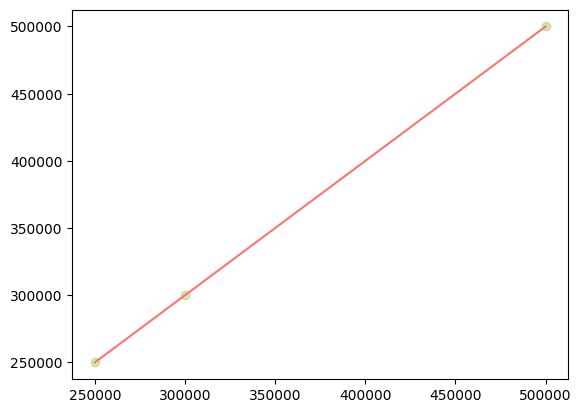

In [193]:
import matplotlib.pyplot as plt 
import numpy as np
plt.scatter(x=y_train, y=y_lr_train_pred, c = "#7CAE00" ,alpha = 0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')
plt.plot()